C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce', exact=False)
C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=join_counts.index, y=join_counts.values, palette='YlGnBu')
C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:31: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alanm\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figur

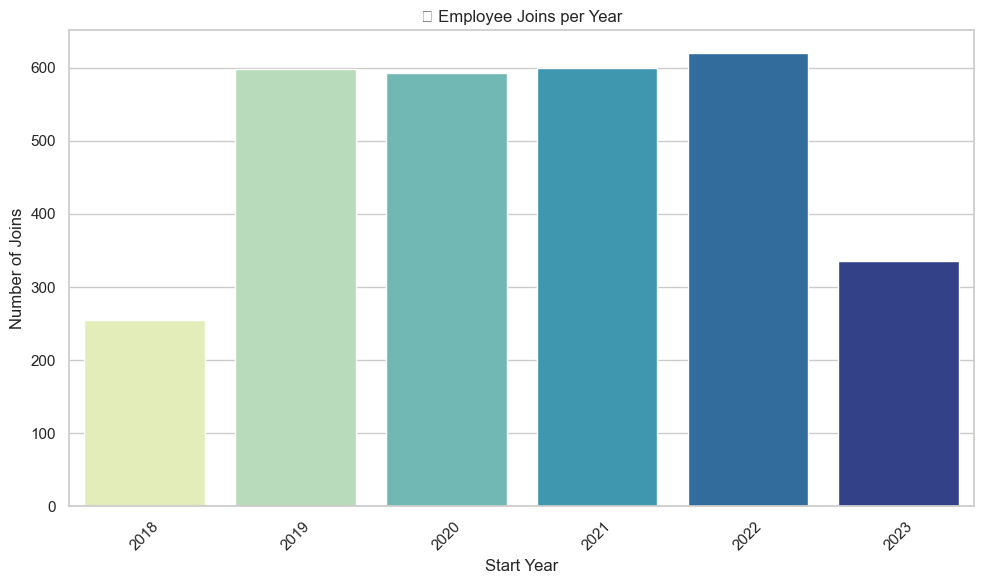

C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='Reds')
C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:46: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alanm\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


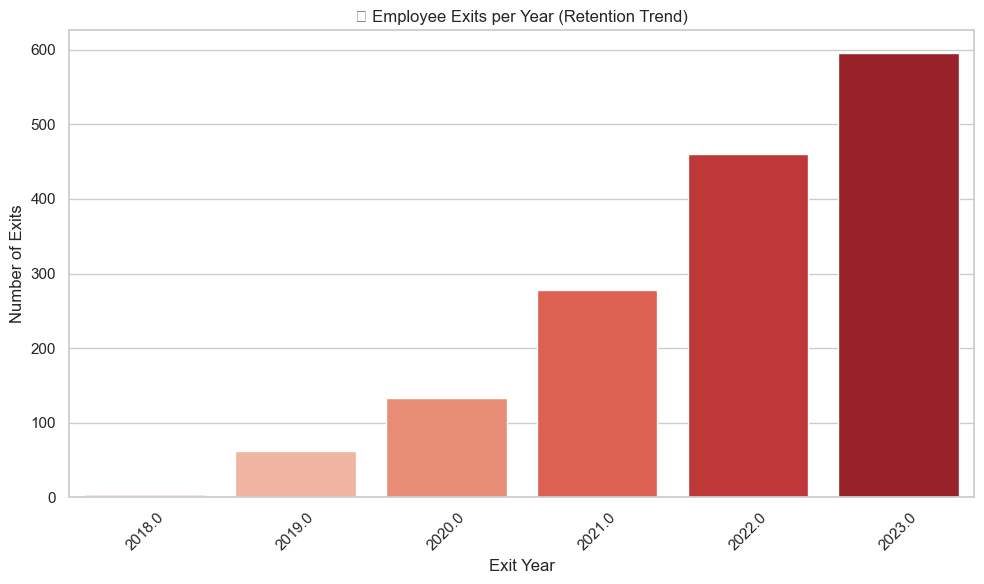

C:\Users\alanm\AppData\Local\Temp\ipykernel_14080\850077102.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alanm\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


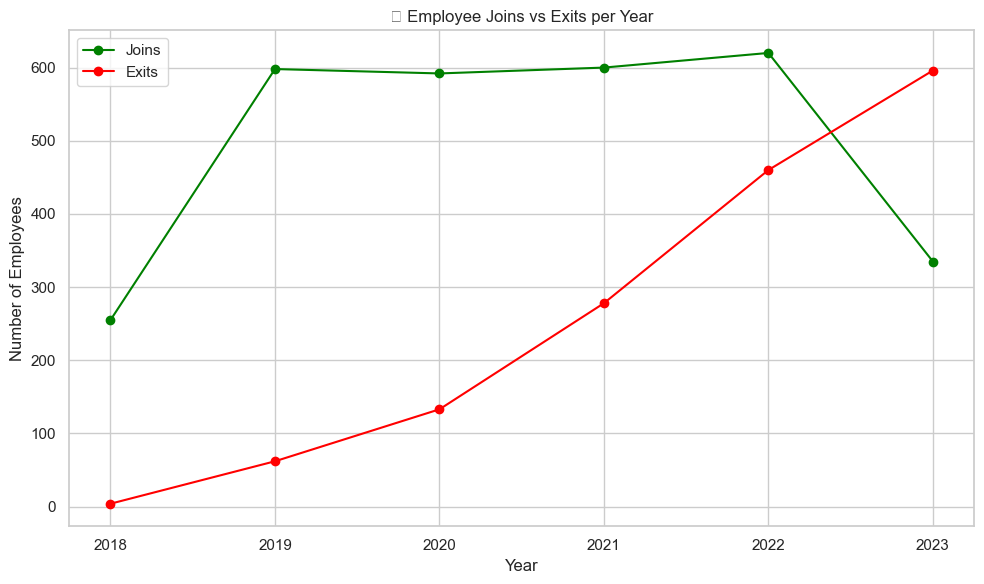

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Convert StartDate and ExitDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce', exact=False)

# Extract StartYear and ExitYear for grouping
df['StartYear'] = df['StartDate'].dt.year
df['ExitYear'] = df['ExitDate'].dt.year

# Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------
# 1. Employee Joins Over Time
# -----------------------------
plt.figure()
join_counts = df['StartYear'].value_counts().sort_index()
sns.barplot(x=join_counts.index, y=join_counts.values, palette='YlGnBu')
plt.title('📅 Employee Joins per Year')
plt.xlabel('Start Year')
plt.ylabel('Number of Joins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Employee Exits Over Time (Retention / Attrition Trend)
# -----------------------------
# Filter only those with valid ExitYear (non-null)
exit_counts = df[df['ExitYear'].notna()]['ExitYear'].value_counts().sort_index()

plt.figure()
sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='Reds')
plt.title('📉 Employee Exits per Year (Retention Trend)')
plt.xlabel('Exit Year')
plt.ylabel('Number of Exits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Start vs Exit Year Comparison (Line Plot)
# -----------------------------
start_by_year = df['StartYear'].value_counts().sort_index()
exit_by_year = df['ExitYear'].dropna().value_counts().sort_index()

# Align indices
combined_years = sorted(set(start_by_year.index).union(set(exit_by_year.index)))
start_counts = [start_by_year.get(year, 0) for year in combined_years]
exit_counts = [exit_by_year.get(year, 0) for year in combined_years]

plt.figure()
plt.plot(combined_years, start_counts, marker='o', label='Joins', color='green')
plt.plot(combined_years, exit_counts, marker='o', label='Exits', color='red')
plt.title('📊 Employee Joins vs Exits per Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
